DASC 522 Final Project Part 1

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn import preprocessing

!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz;



# ann_viz(model, title="My first neural network")

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=8881d32b61da220f14f6f077665921c3c1ff014bbd4a54600caab8a6c2eb8964
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer


AttributeError: ignored

In [ ]:
import statsmodels.api as sm
import seaborn as sb
import random
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.stats import norm
import statistics as st
import numpy as np

import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns


df = pd.read_csv(r'/content/GlobalFirePower.csv', 
                  usecols = {'ISO3','Rank','Mil_Pnl',
                             'Acft', 'Tanks', 'Artillery',
                             'Naval_assets','Rckt_Proj','Ports_term','Def_budget'})
df.isna()
df.dropna()

top_ten = df.head(10)
print(top_ten)

print(df.dtypes)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  ISO3  Rank  Mil_Pnl   Acft  ...  Rckt_Proj  Naval_assets  Ports_term  Def_budget
0  USA     1  2363675  13762  ...       1331           415          24      587800
1  RUS     2  3371027   3794  ...       3793           352           7       44600
2  CHN     3  3712500   2955  ...       1770           714          15      161700
3  IND     4  4207250   2102  ...        292           295           7       51000
4  FRA     5   387635   1305  ...         44           118          14       35000
5  UKD     6   232675    856  ...         42            76          14       45700
6  JPN     7   311875   1594  ...         99           131          10       43800
7  TUR     8   743415   1018  ...        811           194           9        8208
8  GER     9   210000    698  ...         50            81          13       39200
9  EGP    10  1329250   1132  ...       1481           319           7        4400

[10 rows x 10 columns]
ISO3            object
Rank             int64
Mil_Pnl          

Data Visualization

In [ ]:
# Data Table

pd.set_option('max_rows', 10)
pd.set_option('max_colwidth', 10)

display(top_ten)

,ISO3,Rank,Mil_Pnl,Acft,Tanks,Artillery,Rckt_Proj,Naval_assets,Ports_term,Def_budget
0,USA,1,2363675,13762,5884,1934,1331,415,24,587800
1,RUS,2,3371027,3794,20216,5972,3793,352,7,44600
2,CHN,3,3712500,2955,6457,1710,1770,714,15,161700
3,IND,4,4207250,2102,4426,290,292,295,7,51000
4,FRA,5,387635,1305,406,325,44,118,14,35000
5,UKD,6,232675,856,249,89,42,76,14,45700
6,JPN,7,311875,1594,700,202,99,131,10,43800
7,TUR,8,743415,1018,2445,1013,811,194,9,8208
8,GER,9,210000,698,543,154,50,81,13,39200
9,EGP,10,1329250,1132,4110,889,1481,319,7,4400


In [ ]:

pd.set_option('max_rows', 10)
pd.set_option('max_colwidth', 10)
display(df.describe())

,Rank,Mil_Pnl,Acft,Tanks,Artillery,Rckt_Proj,Naval_assets,Ports_term,Def_budget
count,133.00000,1.3300...,133.00...,133.00...,133.00...,133.00...,133.00...,133.00...,133.00...
mean,67.00000,4.4923...,395.42...,744.04...,207.36...,166.00...,69.541353,4.496241,11553....
std,38.53786,1.0602...,1278.0...,2061.9...,632.51...,473.68...,125.53...,4.023838,53323....
min,1.00000,2.2700...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,34.00000,3.0000...,33.000000,31.000000,0.000000,0.000000,6.000000,2.000000,220.00...
50%,67.00000,1.1125...,121.00...,148.00...,18.000000,24.000000,31.000000,4.000000,1870.0...
75%,100.00000,3.0400...,278.00...,531.00...,112.00...,100.00...,75.000000,6.000000,6215.0...
max,133.00000,6.4450...,13762....,20216....,5972.0...,3793.0...,967.00...,24.000000,587800...


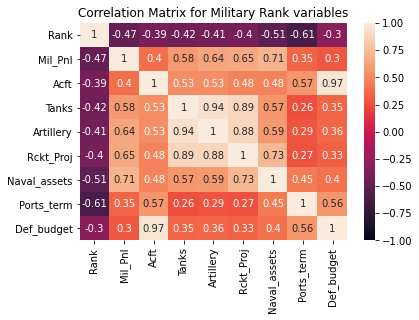

In [ ]:
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True).set(title='Correlation Matrix for Military Rank variables')

In [ ]:
df2= df[['Rank','Mil_Pnl','Acft','Tanks','Artillery','Naval_assets','Rckt_Proj','Ports_term','Def_budget']]
df2 = df2.apply(pd.to_numeric)

y= df2[["Rank"]]
X= df2 [['Mil_Pnl','Acft','Tanks','Artillery','Naval_assets','Rckt_Proj','Ports_term','Def_budget']]

names=X.columns
scaler= preprocessing.MinMaxScaler()
X=scaler.fit_transform(X)
scaled_df = pd.DataFrame(X, columns=names)
scaled_df.head()
print(type(X))

df_reg = pd.DataFrame(X, columns= ['Mil_Pnl','Acft','Tanks','Artillery','Naval_assets','Rckt_Proj','Ports_term','Def_budget'])
df_reg['Rank'] = y
print(df_reg)



<class 'numpy.ndarray'>
      Mil_Pnl      Acft     Tanks  ...  Ports_term  Def_budget  Rank
0    0.366522  1.000000  0.291057  ...   1.000000    1.000000      1
1    0.522877  0.275529  1.000000  ...   0.291667    0.075860      2
2    0.575879  0.214550  0.319400  ...   0.625000    0.275081      3
3    0.652671  0.152555  0.218935  ...   0.291667    0.086749      4
4    0.059814  0.094629  0.020083  ...   0.583333    0.059528      5
..        ...       ...       ...  ...        ...         ...    ...
128  0.000552  0.000073  0.000198  ...   0.083333    0.000014    129
129  0.002887  0.001672  0.001731  ...   0.083333    0.000049    130
130  0.001316  0.000145  0.000099  ...   0.125000    0.000005    131
131  0.000000  0.000000  0.000000  ...   0.083333    0.000097    132
132  0.000812  0.000073  0.000000  ...   0.000000    0.000000    133

[133 rows x 9 columns]


In [ ]:
from sklearn.metrics import mean_squared_error
# # Classical split

# split into 2 dataframes
df_train=df_reg.sample(frac=0.7,random_state=42) 
df_test=df_reg.drop(df_train.index)

train_features = df_train.copy()
test_features = df_test.copy()

train_labels = train_features.pop('Rank')
test_labels = test_features.pop('Rank')

model_no_norm = smf.ols('Rank ~ Mil_Pnl+Acft+Tanks+Artillery+Naval_assets+Rckt_Proj+Ports_term+Def_budget', df2).fit()
print(model_no_norm.summary())

model2=smf.ols('Rank ~ Mil_Pnl+Acft+Tanks+Artillery+Naval_assets+Rckt_Proj+Ports_term+Def_budget', df_train).fit()
print(model2.summary())

model3=smf.ols('Rank ~ Mil_Pnl+Acft+Tanks+Rckt_Proj+Ports_term+Def_budget', df_train).fit()
print(model3.summary())

model4=smf.ols('Rank ~ Acft+Rckt_Proj+Ports_term+Def_budget', df_train).fit()
print(model4.summary())

# # split train/test into X_train, y_train & X_test, y_test
X_train = df_train[['Mil_Pnl','Acft','Tanks','Artillery','Naval_assets','Rckt_Proj','Ports_term','Def_budget']]
y_train = df_train[['Rank']]
X_test = df_test[['Mil_Pnl','Acft','Tanks','Artillery','Naval_assets','Rckt_Proj','Ports_term','Def_budget']]
y_test = df_test[['Rank']]


# # compare MSE for train and test sets
y_pred_train = model_no_norm.predict(X_train)
y_pred_test = model_no_norm.predict(X_test)

MSE_train1 = mean_squared_error(y_train, y_pred_train)
MSE_test1 = mean_squared_error(y_test, y_pred_test)
print(MSE_train1)
print(MSE_test1)
 
# # compare MSE for train and test sets
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)

MSE_train2 = mean_squared_error(y_train, y_pred_train)
MSE_test2 = mean_squared_error(y_test, y_pred_test)
print(MSE_train2)
print(MSE_test2)

# # compare MSE for train and test sets
y_pred_train = model3.predict(X_train)
y_pred_test = model3.predict(X_test)

MSE_train3 = mean_squared_error(y_train, y_pred_train)
MSE_test3 = mean_squared_error(y_test, y_pred_test)
print(MSE_train3)
print(MSE_test3)

# # compare MSE for train and test sets
y_pred_train = model4.predict(X_train)
y_pred_test = model4.predict(X_test)

MSE_train4 = mean_squared_error(y_train, y_pred_train)
MSE_test4 = mean_squared_error(y_test, y_pred_test)
print(MSE_train4)
print(MSE_test4)



                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     17.49
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           3.10e-17
Time:                        21:48:08   Log-Likelihood:                -623.65
No. Observations:                 133   AIC:                             1265.
Df Residuals:                     124   BIC:                             1291.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       98.4687      3.823     25.758   

In [ ]:
model = smf.ols('Rank ~ Mil_Pnl+Acft+Tanks+Artillery+Naval_assets+Rckt_Proj+Ports_term+Def_budget'
,data=df_reg).fit()


print_model = model.summary()
print(print_model)





                            OLS Regression Results                            
Dep. Variable:                   Rank   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     17.49
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           3.10e-17
Time:                        21:42:58   Log-Likelihood:                -623.65
No. Observations:                 133   AIC:                             1265.
Df Residuals:                     124   BIC:                             1291.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       98.3705      3.819     25.757   

PatsyError: ignored

In [ ]:
# Machine Learning Split

from sklearn.model_selection import train_test_split
# 1st split - remove 15% for validation (holdout). 
X_splitAgain, X_val, y_splitAgain, y_val = train_test_split(X, y, test_size=0.15,
                                                            random_state=44) 

# 2nd split
X_train, X_test, y_train, y_test = train_test_split(X_splitAgain, y_splitAgain,test_size=0.1763,
                                                    random_state=44) 

print('Train set shape\n',X_train.shape, y_train.shape)
print('Test set shape\n',X_test.shape, y_test.shape)
print('Val set shape\n',X_val.shape, y_val.shape)
print(' ')

Train set shape
 (93, 8) (93, 1)
Test set shape
 (20, 8) (20, 1)
Val set shape
 (20, 8) (20, 1)
 


Epoch 1/1000
3/3 [==============================] - 0s 73ms/step - loss: 5176.9546 - mse: 5176.9546 - val_loss: 7083.1035 - val_mse: 7083.1035
Epoch 2/1000
3/3 [==============================] - 0s 11ms/step - loss: 5164.8745 - mse: 5164.8745 - val_loss: 7069.9624 - val_mse: 7069.9624
Epoch 3/1000
3/3 [==============================] - 0s 10ms/step - loss: 5153.7588 - mse: 5153.7588 - val_loss: 7057.3188 - val_mse: 7057.3188
Epoch 4/1000
3/3 [==============================] - 0s 9ms/step - loss: 5142.8188 - mse: 5142.8188 - val_loss: 7043.7466 - val_mse: 7043.7466
Epoch 5/1000
3/3 [==============================] - 0s 11ms/step - loss: 5131.0635 - mse: 5131.0635 - val_loss: 7029.0601 - val_mse: 7029.0601
Epoch 6/1000
3/3 [==============================] - 0s 10ms/step - loss: 5118.5249 - mse: 5118.5249 - val_loss: 7013.0063 - val_mse: 7013.0063
Epoch 7/1000
3/3 [==============================] - 0s 10ms/step - loss: 5105.0547 - mse: 5105.0547 - val_loss: 6995.5874 - val_mse: 6995.5874


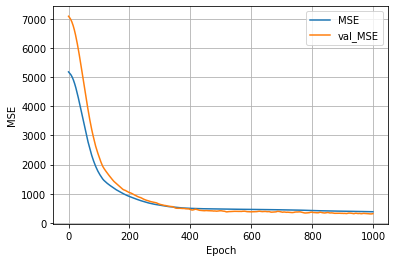

In [ ]:
# DNN REGRESSIOM
from tensorflow.keras import layers
from keras.layers import Dropout

dnn_model = tf.keras.Sequential()
dnn_model.add(tf.keras.layers.Dense(8, activation='relu'))
# dnn_model.add(Dropout(0.2))  # TW added dropout
dnn_model.add(tf.keras.layers.Dense(1, activation='linear'))

dnn_model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.01),
                  metrics='mse')
history = dnn_model.fit(train_features, train_labels,
    epochs=1000,
    # suppress logging if 0
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

plt.plot(history.history['mse'], label='MSE')
plt.plot(history.history['val_mse'], label='val_MSE')

# plt.ylim([1,y_lim])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()



# ann_viz(dnn_model, title="My first neural network")

In [ ]:
ann_viz(dnn_model, view=True,filename="network.gv", title="deep neural network")
print(ann_viz)

<function ann_viz at 0x7f09d31f4a70>


In [ ]:
# DNN REGRESSIOM
from tensorflow.keras import layers
from keras.layers import Dropout

dnn_model = tf.keras.Sequential()
dnn_model.add(tf.keras.layers.Dense(8, activation='relu'))
dnn_model.add(Dropout(0.2))  # TW added dropout
dnn_model.add(tf.keras.layers.Dense(1, activation='linear'))


Epoch 1/1000
3/3 [==============================] - 1s 90ms/step - loss: 5179.0454 - mse: 5179.0454 - val_loss: 7084.4805 - val_mse: 7084.4805
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 5162.5571 - mse: 5162.5571 - val_loss: 7063.9751 - val_mse: 7063.9751
Epoch 3/1000
3/3 [==============================] - 0s 12ms/step - loss: 5146.2559 - mse: 5146.2559 - val_loss: 7041.4111 - val_mse: 7041.4111
Epoch 4/1000
3/3 [==============================] - 0s 11ms/step - loss: 5126.9468 - mse: 5126.9468 - val_loss: 7017.6553 - val_mse: 7017.6553
Epoch 5/1000
3/3 [==============================] - 0s 12ms/step - loss: 5105.6299 - mse: 5105.6299 - val_loss: 6992.0493 - val_mse: 6992.0493
Epoch 6/1000
3/3 [==============================] - 0s 11ms/step - loss: 5083.7197 - mse: 5083.7197 - val_loss: 6964.4868 - val_mse: 6964.4868
Epoch 7/1000
3/3 [==============================] - 0s 14ms/step - loss: 5055.7153 - mse: 5055.7153 - val_loss: 6934.7695 - val_mse: 6934.7695

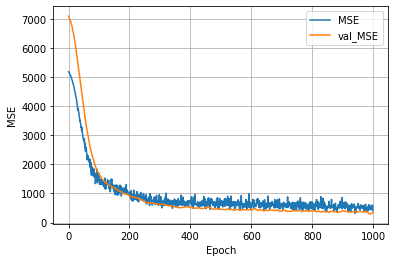

In [ ]:

dnn_model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.01),
                  metrics='mse')
history = dnn_model.fit(train_features, train_labels,
    epochs=1000,
    # suppress logging if 0
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

plt.plot(history.history['mse'], label='MSE')
plt.plot(history.history['val_mse'], label='val_MSE')

# plt.ylim([1,y_lim])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

Sample HP sweep

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 16ms/step - loss: 425.0274 - mse: 425.0274 - val_loss: 355.1785 - val_mse: 355.1785
Epoch 506/1000
3/3 [==============================] - 0s 16ms/step - loss: 424.4734 - mse: 424.4734 - val_loss: 353.0477 - val_mse: 353.0477
Epoch 507/1000
3/3 [==============================] - 0s 17ms/step - loss: 423.8962 - mse: 423.8962 - val_loss: 347.9124 - val_mse: 347.9124
Epoch 508/1000
3/3 [==============================] - 0s 17ms/step - loss: 423.5105 - mse: 423.5105 - val_loss: 343.7113 - val_mse: 343.7113
Epoch 509/1000
3/3 [==============================] - 0s 17ms/step - loss: 423.2009 - mse: 423.2009 - val_loss: 340.3860 - val_mse: 340.3860
Epoch 510/1000
3/3 [==============================] - 0s 16ms/step - loss: 422.6756 - mse: 422.6756 - val_loss: 336.0319 - val_mse: 336.0319
Epoch 511/1000
3/3 [==============================] - 0s 19ms/step - loss: 422.3374 - mse: 422.3374 - val_loss: 331.21

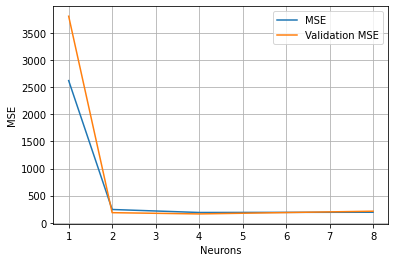

In [ ]:
number_of_inputs= train_features.shape[1]

# sweep neurons
mse_list = []
val_mse_list = []

neurons_to_try = [1, 2, 4, 8]

for num_neurons in neurons_to_try:

  #---- pasted in model
  model = keras.Sequential([layers.Dense(num_neurons, activation='relu', input_dim=number_of_inputs),
                            layers.Dense(num_neurons, activation='relu'),
                            layers.Dense(1, activation='linear') ])  
    
  model.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics='mse')

  history = model.fit(train_features, train_labels,
                      epochs=1000,
                      validation_split = 0.2)  # Calculate validation results on 20% of the training data
                    
  # Isolate the  metric for each epoch.
  hist = pd.DataFrame(history.history)

  # evaluate the keras model
  _, my_mse = model.evaluate(X, y)

  print('\n Final MSE: %.2f' % (my_mse))

  #---- end model paste



  current_mse=hist['mse']
  current_mse=current_mse[len(current_mse)-1] #  last element is the final value
  mse_list.append(current_mse)  

  current_val_mse=hist['val_mse']
  current_val_mse=current_val_mse[len(current_val_mse)-1] #  last element is the final value
  val_mse_list.append(current_val_mse)


#plot results
plt.plot(neurons_to_try, mse_list, label='MSE')
plt.plot(neurons_to_try, val_mse_list, label='Validation MSE')

# plt.ylim([1,y_lim])
plt.xlabel('Neurons')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/100
3/3 [==============================] - 1s 79ms/step - loss: 5178.0049 - mse: 5178.0049 - val_loss: 7092.7930 - val_mse: 7092.7930
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 5174.3916 - mse: 5174.3916 - val_loss: 7088.3882 - val_mse: 7088.3882
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 5170.7061 - mse: 5170.7061 - val_loss: 7083.9985 - val_mse: 7083.9985
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 5167.0967 - mse: 5167.0967 - val_loss: 7079.5635 - val_mse: 7079.5635
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 5163.5024 - mse: 5163.5024 - val_loss: 7075.1133 - val_mse: 7075.1133
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 5159.8467 - mse: 5159.8467 - val_loss: 7070.6758 - val_mse: 7070.6758
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 5156.1841 - mse: 5156.1841 - val_loss: 7066.2271 - val_mse: 7066.2271
Epoch 

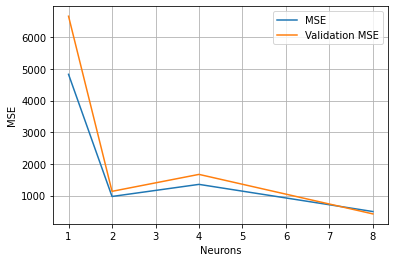

In [ ]:
number_of_inputs= train_features.shape[1]

# sweep neurons
mse_list = []
val_mse_list = []

neurons_to_try = [1, 2, 4, 8]

for num_neurons in neurons_to_try:

  #---- pasted in model
  model = keras.Sequential([layers.Dense(num_neurons, activation='relu', input_dim=number_of_inputs),
                            layers.Dense(num_neurons, activation='relu'),
                            layers.Dense(1, activation='linear') ])  
    
  model.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics='mse')

  history = model.fit(train_features, train_labels,
                      epochs=100,
                      validation_split = 0.2)  # Calculate validation results on 20% of the training data
                    
  # Isolate the  metric for each epoch.
  hist = pd.DataFrame(history.history)

  # evaluate the keras model
  _, my_mse = model.evaluate(X, y)

  print('\n Final MSE: %.2f' % (my_mse))

  #---- end model paste



  current_mse=hist['mse']
  current_mse=current_mse[len(current_mse)-1] #  last element is the final value
  mse_list.append(current_mse)  

  current_val_mse=hist['val_mse']
  current_val_mse=current_val_mse[len(current_val_mse)-1] #  last element is the final value
  val_mse_list.append(current_val_mse)


#plot results
plt.plot(neurons_to_try, mse_list, label='MSE')
plt.plot(neurons_to_try, val_mse_list, label='Validation MSE')

# plt.ylim([1,y_lim])
plt.xlabel('Neurons')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 16ms/step - loss: 2693.1362 - mse: 2693.1362 - val_loss: 3804.1123 - val_mse: 3804.1123
Epoch 496/1000
3/3 [==============================] - 0s 14ms/step - loss: 2687.3694 - mse: 2687.3694 - val_loss: 3795.9573 - val_mse: 3795.9573
Epoch 497/1000
3/3 [==============================] - 0s 17ms/step - loss: 2681.1094 - mse: 2681.1094 - val_loss: 3787.8430 - val_mse: 3787.8430
Epoch 498/1000
3/3 [==============================] - 0s 14ms/step - loss: 2675.7078 - mse: 2675.7078 - val_loss: 3778.9500 - val_mse: 3778.9500
Epoch 499/1000
3/3 [==============================] - 0s 21ms/step - loss: 2670.0935 - mse: 2670.0935 - val_loss: 3770.0657 - val_mse: 3770.0657
Epoch 500/1000
3/3 [==============================] - 0s 15ms/step - loss: 2663.7947 - mse: 2663.7947 - val_loss: 3761.2710 - val_mse: 3761.2710
Epoch 501/1000
3/3 [==============================] - 0s 13ms/step - loss: 2657.9158 - mse: 26

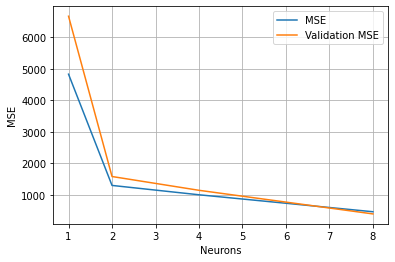

In [ ]:
number_of_inputs= train_features.shape[1]

# sweep neurons
mse_list = []
val_mse_list = []

neurons_to_try = [1, 2, 4, 8]

for num_neurons in neurons_to_try:

  #---- pasted in model
  model = keras.Sequential([layers.Dense(num_neurons, activation='relu', input_dim=number_of_inputs),
                            layers.Dense(num_neurons, activation='relu'),
                            layers.Dense(1, activation='linear') ])  
    
  model.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics='mse')

  history = model.fit(train_features, train_labels,
                      epochs=1000,
                      validation_split = 0.2)  # Calculate validation results on 20% of the training data
                    
  # Isolate the  metric for each epoch.
  hist = pd.DataFrame(history.history)

  # evaluate the keras model
  _, my_mse = model.evaluate(X, y)

  print('\n Final MSE: %.2f' % (my_mse))

  #---- end model paste



  current_mse=hist['mse']
  current_mse=current_mse[len(current_mse)-1] #  last element is the final value
  mse_list.append(current_mse)  

  current_val_mse=hist['val_mse']
  current_val_mse=current_val_mse[len(current_val_mse)-1] #  last element is the final value
  val_mse_list.append(current_val_mse)


#plot results
plt.plot(neurons_to_try, mse_list, label='MSE')
plt.plot(neurons_to_try, val_mse_list, label='Validation MSE')

# plt.ylim([1,y_lim])
plt.xlabel('Neurons')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()